# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [8]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
import dill

expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]

f(a)

485165294.4097903

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

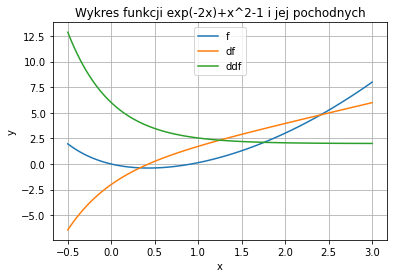

In [40]:
x = np.linspace(-0.5, 3, 100)
plt.plot(x, main.fun(x), label='f')
plt.plot(x, main.dfun(x), label='df')
plt.plot(x, main.ddfun(x), label='ddf')
plt.grid()
plt.legend(loc=9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres funkcji exp(-2x)+x^2-1 i jej pochodnych')
plt.show()

Z grubsza możemy określić, że nasza funkcja ma 2 miejsca zerowe. 
Pierwsze znajduję się na pewno w przedziale (-0.5, 0.25), a drugie (0.5, 2).

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [62]:
from scipy import optimize
from scipy.optimize import fsolve

sol = optimize.root(main.fun, [0, 1])
sol1 = fsolve(main.fun, [0, 1])

print(sol.x)
print(sol1)

[0.         0.91656258]
[0.         0.91656258]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [124]:
#Metoda bisekcji 
print(main.bisection(-0.5, 2, main.fun, 10**(-10), 100)) #Musimy pamiętać, żeby wybrać zakres w którym funkcja zmienia znak 
                                                         #stąd wynikiem jest None (w tym  przypadku).
print(main.bisection(-0.5, 0.25, main.fun, 1e-10, 100))
print(main.bisection(0.5, 2, main.fun, 1e-10, 100))

None
(5.820766091346741e-11, 31)
(0.9165625831228681, 32)


In [121]:
#Metoda siecznych
print(main.secant(-0.5, 0.25, main.fun, 1e-10, 100))
print(main.secant(0.5, 2, main.fun, 1e-10, 100))

(4.6990406360014935e-11, 31)
(0.9165625830609662, 29)


In [122]:
#Metoda newtona
print(main.newton(main.fun, main.dfun, main.ddfun, -0.5, 0.25, 1e-10, 100))
print(main.newton(main.fun, main.dfun, main.ddfun, 0.5, 2, 1e-10, 100))

(-5.125559246038141e-17, 5)
(0.916562583105698, 5)


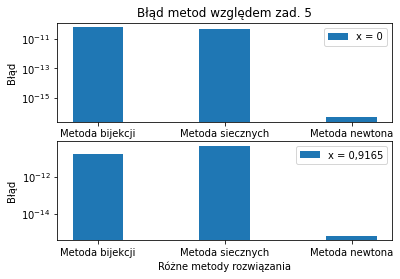

In [177]:
x1, _ = main.bisection(-0.25, 0.5, main.fun, 1e-10, 100)
x2, _ = main.bisection(0.5, 2, main.fun, 1e-10, 100)

x1_s, _ = main.secant(-0.5, 0.25, main.fun, 1e-10, 100)
x2_s, _ = main.secant(0.5, 2, main.fun, 1e-10, 100)

x1_n, _ = main.newton(main.fun, main.dfun, main.ddfun, -0.5, 0.25, 1e-10, 100)
x2_n, _ = main.newton(main.fun, main.dfun, main.ddfun, 0.5, 2, 1e-10, 100)

x = ["Metoda bijekcji", "Metoda siecznych", "Metoda newtona"]
h1 = [np.abs(x1 - sol.x[0]), np.abs(x1_s - sol.x[0]), np.abs(x1_n - sol.x[0])]
h2 = [np.abs(x2 - sol.x[1]), np.abs(x2_s - sol.x[1]), np.abs(x2_n - sol.x[1])]

fig, (ax, ax1) = plt.subplots(2, 1)
ax.bar(x, h1, width=0.4, label='x = 0')
ax.set_ylabel('Błąd')
ax.set_yscale('log')
ax.legend()
ax.set_title('Błąd metod względem zad. 5')

ax1.bar(x, h2, width=0.4, label='x = 0,9165')
ax1.set_xlabel('Różne metody rozwiązania')
ax1.set_ylabel('Błąd')
ax1.set_yscale('log')
ax1.legend()

plt.show()

Jak widać metoda newtona jest najbardziej dokładna spośród poznanych na tych zajęciach.
Osiąga ona błąd na poziomie zera maszynowego w 5 interacjach (w przypadku parametrów, które dobrałem).

529 ns ± 45.8 ns per loop (mean ± std. dev. of 10 runs, 20 loops each)
153 µs ± 39.9 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
215 µs ± 29.2 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
287 µs ± 5.08 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
310 µs ± 15.6 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
326 µs ± 28.1 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
307 µs ± 8.53 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
311 µs ± 6.64 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
326 µs ± 30.3 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
313 µs ± 12.8 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


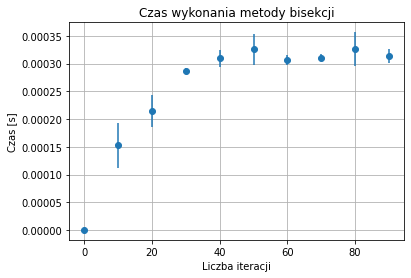

In [136]:
iteration = []
time = []
mistake = []
for i in range(0, 100, 10):
    iteration.append(i)
    saved_timing = %timeit -r 10 -n 20 -o main.bisection(-0.5, 0.25, main.fun, 1e-10, i)
    time.append(saved_timing.average)
    mistake.append(saved_timing.stdev)
    
plt.errorbar(iteration, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania metody bisekcji')
plt.show()

570 ns ± 52.9 ns per loop (mean ± std. dev. of 10 runs, 20 loops each)
225 µs ± 28.5 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
409 µs ± 29.1 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
637 µs ± 70.3 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
715 µs ± 82 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
647 µs ± 50.7 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
603 µs ± 7.16 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
720 µs ± 90.3 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
684 µs ± 55.2 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
603 µs ± 7.56 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


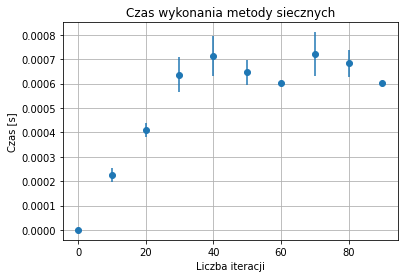

In [135]:
iteration = []
time = []
mistake = []
for i in range(0, 100, 10):
    iteration.append(i)
    saved_timing = %timeit -r 10 -n 20 -o main.secant(-0.5, 0.25, main.fun, 1e-10, i)
    time.append(saved_timing.average)
    mistake.append(saved_timing.stdev)
    
plt.errorbar(iteration, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania metody siecznych')
plt.show()

150 µs ± 36.3 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
166 µs ± 45.8 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
141 µs ± 9.09 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
148 µs ± 12.4 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
152 µs ± 24.1 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
156 µs ± 24.9 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
157 µs ± 29.1 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
205 µs ± 50.8 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
189 µs ± 52.7 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
160 µs ± 44.9 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


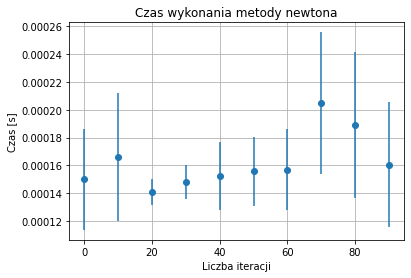

In [134]:
iteration = []
time = []
mistake = []
for i in range(0, 100, 10):
    iteration.append(i)
    saved_timing = %timeit -r 10 -n 20 -o main.newton(main.fun, main.dfun, main.ddfun, -0.5, 0.25, 1e-10, i)
    time.append(saved_timing.average)
    mistake.append(saved_timing.stdev)
    
plt.errorbar(iteration, time, yerr=mistake, marker='o',linestyle="None")
plt.grid()
plt.xlabel('Liczba iteracji'), plt.ylabel('Czas [s]')
plt.title('Czas wykonania metody newtona')
plt.show()

Z kolei pod względem czasu znowu najlepiej wypada metoda newtona.
Pozostałe dwie są nieco wolniejsze, jednak ich czas wykonywania jest tak krótki, iż nie powinno być to zauważalne. 
Ostatecznie możemy stwierdzić, że najlepszym wyborem pod wszystkimi względami byłoby wybranie metody newtona. :)